# Direction Detection by Multiple Microphones

$$
\begin{eqnarray}
\text{Microphone 1} &:& \vec{M_1} = (-c,0)^T \\ 
\text{Microphone 2} &:& \vec{M_2} = (+c,0)^T \\ 
\text{Separation of mics} &:& d = 2c \\
\text{Source} &:& \vec{S} = (x,y)^T \\
\text{Range 1} &:& \vec{r_1} = \vec{S} - \vec{M_1} \\
\text{Range 2} &:& \vec{r_2} = \vec{S} - \vec{M_2} \\
\text{Range difference} &:& \Delta \vec{r} = \vec{r_2} - \vec{r_1} \, , \, \Delta r = |\Delta \vec{r}|\\
\text{Distance of hyperbola vertex to center} &:& a \\
\text{Semi major axis of hyperbola} &:& c \\
\end{eqnarray}
$$

Task: <br>
Search all point $\vec{S}$ that fulfill $\Delta r = 2a$. This defines a hyperpola. <br>
The section [**Locus of Points**](https://en.wikipedia.org/wiki/Hyperbola#:~:text=As%20locus%20of%20points) on Wikipedia explains why.

Angle of direction for long distance and plane wave assumption: $\Delta r = d\cos\Theta$

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# some functions
vec2d = lambda x,y: np.array([x,y])
norm = lambda V: np.sqrt((V**2).sum())

In [2]:
# What is a typical wavelength?
v  = 343  # m/s
f = 1000  # Hz
lam = v/f # m
print(f"Wavelength {lam = } m")

Wavelength lam = 0.343 m


In [13]:
d = 0.3 # Distance of microphones
c = d/2 # Focus location, half distance
print(f"Focus location {c = } m")

Focus location c = 0.15 m


In [16]:
M1 = vec2d(-c,0)
M2 = vec2d(+c,0)

## Coordinates of the sound source

In [17]:
# Example source position
S = vec2d(0.2, 0.2)
print(f"Example source location S(x,y) = ({S[0]}, {S[1]}) m")

Example source location S(x,y) = (0.2, 0.2) m


In [8]:
# Ranges to microphone 1 and 2
r1 = norm(S-M1)
r2 = norm(S-M2)

# half the range difference
dr = (r1 - r2)
a = dr/2

theta = np.arccos(dr/d)

# eccentricity
ecc = c/a

# kind of short major axis 
b = np.sqrt(c**2 - a**2)

print(f"Range {r1 = :.3f} m")
print(f"Range {r2 = :.3f} m")
print(f"Range diff: dr = {2*a = :.3f} m")
print(f"Eccentricity: {ecc = :.3f}")


Range r1 = 0.403 m
Range r2 = 0.206 m
Range diff: dr = 2*a = 0.197 m
Eccentricity: ecc = 1.523


Axes limits: axlim = 1 m


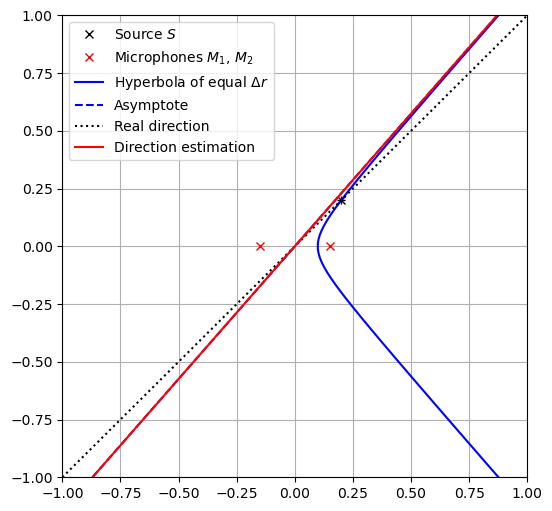

In [19]:
yy = np.linspace(-axlim, axlim, 100)
xx = np.sqrt((a/b*yy)**2 + a**2)
fig,ax = plt.subplots(1,figsize=(6,6))

# Source
ax.plot(S[0],S[1],"kx", label = r"Source $S$")
ax.plot(S[0],S[1],"k+")

# Microphones
ax.plot(M1[0],M1[1],"rx", label = r"Microphones $M_1$, $M_2$")
ax.plot(M2[0],M2[1],"rx")

# Hyperbola running through S
ax.plot(xx,yy,"b",label = r"Hyperbola of equal $\Delta r$")

# Hyperbola asymptote
ax.axline((0, 0), slope=b/a, color="b", linestyle="--", label = "Asymptote")

# Straight line running through S
ax.axline((0, 0), slope=S[1]/S[0], color="k", linestyle=(":"), label = r"Real direction")

# Direction estimation
ax.axline((0, 0), slope=np.tan(theta), color="r", linestyle=("-"), label = r"Direction estimation")

# automatic axes limits for square plot rounded to 1 m
axlim = int(max(S[0],S[1])+1)
print(f"Axes limits: {axlim = } m")

ax.set_xlim(-axlim,axlim)
ax.set_ylim(-axlim,axlim)

ax.grid(True)
ax.legend()

fig.savefig("hyperbola.png")
plt.show()